# 2020 Energy Benchmarking Data Analysis for New York, Los Angeles, Chicago

Building energy benchmarking refers to measuring a building’s energy use and comparing the data to the energy use of similar buildings. Several cities have
enacted benchmarking and transparency laws that require the collection and public release of the data used here. 



New York City's benchmarking law requires all buildings over 25,000 square feet to benchmark for energy and covers 60 percent of NYC’s square footage of buildings.  
In Los Angeles, city owned buildings that are 7,500 square feet or more and all commercial, residential (including condominiums), and industrial buildings (including parking structures) larger than 20,000 square feet are required to report annual energy usage data.  
Under Chicago benchmarking law, buildings over 50,000 square feet are required to report their energy usage data.



The below is an analysis of 2020 energy data captured for energy benchmarking compliance by the top 3 largest U.S. cities - New York City, Los Angeles and Chicago.  

In [ ]:
#@title
!pip install pySankey
#Import Data Set and Python Libraries
import math, time, random, datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('white')
from pySankey.sankey import sankey


from google.colab import drive
drive.mount('/content/drive')

path = "drive/My Drive/Colab Notebooks/data/energy/"

NYC_data = pd.read_excel(path+"NYC_2020_Data_Updated.xlsx")
LA_data = pd.read_excel(path+"LA_2020_Data_Updated.xlsx")
CHI_data = pd.read_excel(path+"Chicago_2020_Data_Updated.xlsx")
data_list = [NYC_data, LA_data, CHI_data]
data_names = ['New York City', 'Los Angeles', 'Chicago']

# Comparing America’s Top 3 Largest Cities

## Energy Sources

Buildings use different mixes of energy including electricity, natural gas, fuel oil, propane, district energy systems and many others   
**District Energy Systems:** District energy is circulated through an underground network of pipes to buildings connected to the district energy system and provides chilled water for cooling, steam for heating and hot water for domestic hot water.

<br>

**New York** - Top energy sources in kBtu

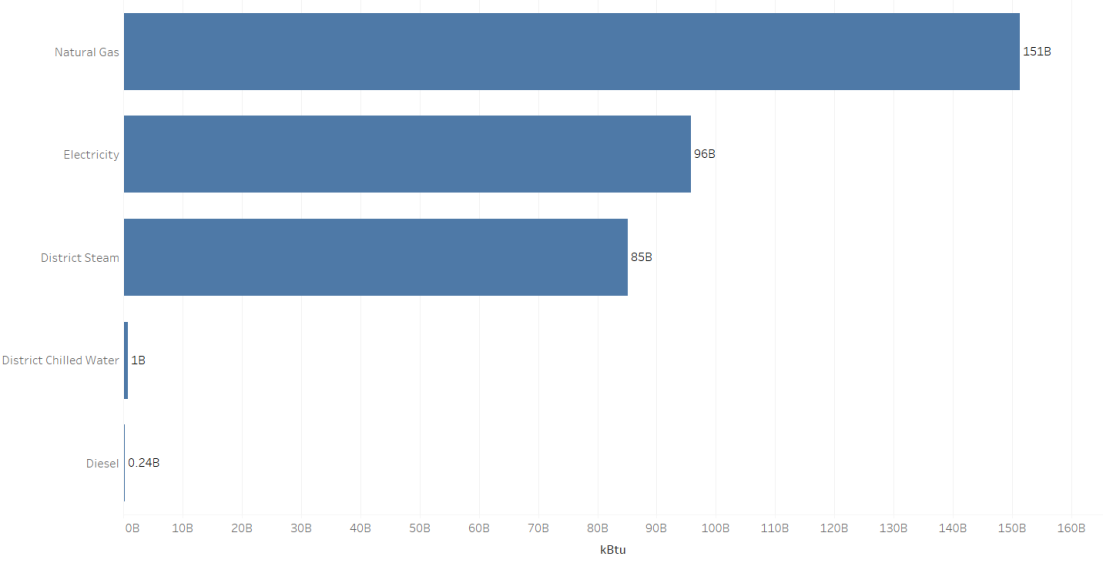

**New York** - Energy Sources for the top 5 primary uses of reported buildings  
- Office buildings use more electricity and district steam while the other top 4 primary use types use mostly natural gas

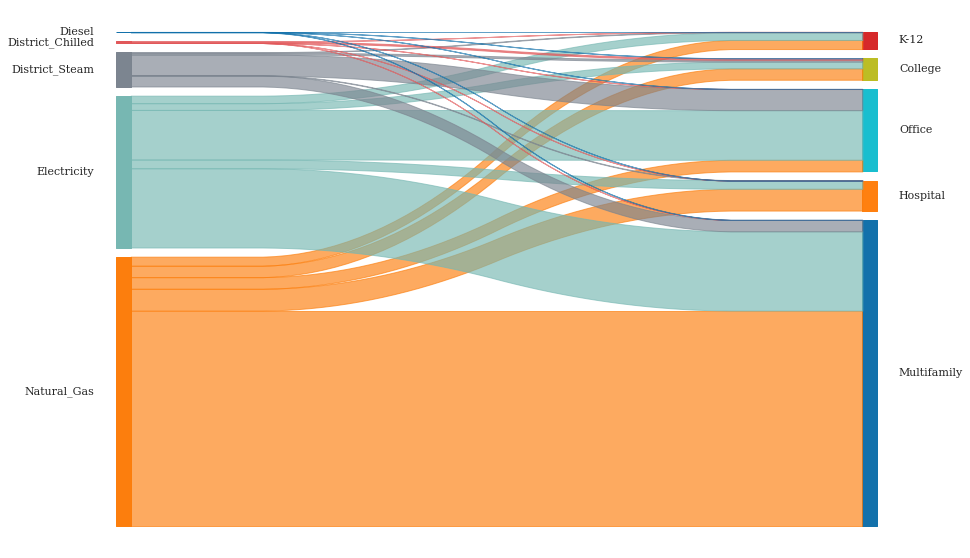

In [ ]:
from matplotlib import font_manager
#@title
nyc = NYC_data[['Primary Use', 'Natural Gas Use (kBtu)','Electricity Use - Grid Purchase (kBtu)','District Steam Use (kBtu)','District Chilled Water Use (kBtu)','Diesel #2 Use (kBtu)']]

nyc = nyc.groupby(['Primary Use']).agg(
     Natural_Gas = ('Natural Gas Use (kBtu)','sum'),
     Electricity = ('Electricity Use - Grid Purchase (kBtu)','sum'),
     District_Steam = ('District Steam Use (kBtu)','sum'),
     District_Chilled = ('District Chilled Water Use (kBtu)','sum'),
     Diesel = ('Diesel #2 Use (kBtu)','sum'),
     )

nyc.sort_values('Natural_Gas', ascending=False, inplace=True)

nyc = nyc.head(5)

nyc = nyc.stack()

nyc = nyc.reset_index()

nyc.replace('Multifamily Housing', 'Multifamily', inplace=True)
nyc.replace('Hospital (General Medical & Surgical)', 'Hospital', inplace=True)
nyc.replace('College/University', 'College', inplace=True)
nyc.replace('K-12 School', 'K-12', inplace=True)

NYC_sankey = nyc

colorDict =  {'Natural_Gas':'#FC7D0B','Electricity':'#76B7B2','District_Steam':'#7B848F',
              'District_Chilled':'#E15759','Diesel':'#1170AA', 'Multifamily':'#1170AA','Hospital':'#FF7F0E','Office':'#17BECF',
              'College':'#BCBD22','K-12':'#D62728'}

sankey(
    left=NYC_sankey["level_1"], right=NYC_sankey["Primary Use"], 
    leftWeight= NYC_sankey[0], rightWeight=NYC_sankey[0], 
    aspect=20, colorDict=colorDict, fontsize=11,
)



# Get current figure
fig = plt.gcf()


# Set size in inches
fig.set_size_inches(15, 10)

<br>

***Los Angeles did not release energy sources data***

<br>

**Chicago** - Top Energy Sources  in kBtu

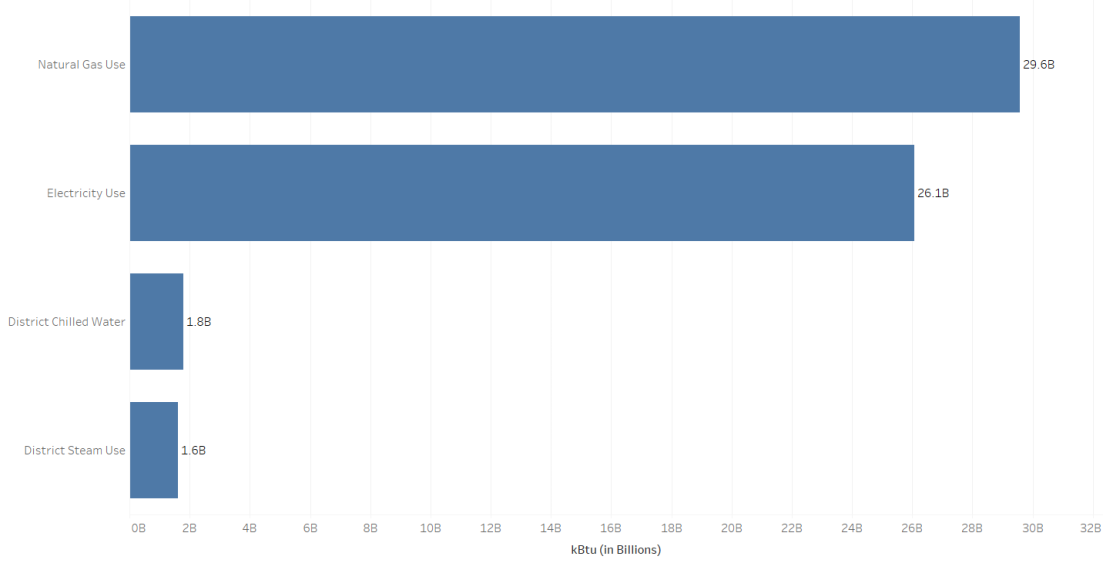

**Chicago** - Energy Sources for the top 5 primary uses of reported buildings  
- Similar to NYC, office buildings in Chicago use more electricity and district steam while the other top 4 primary use types use mostly natural gas

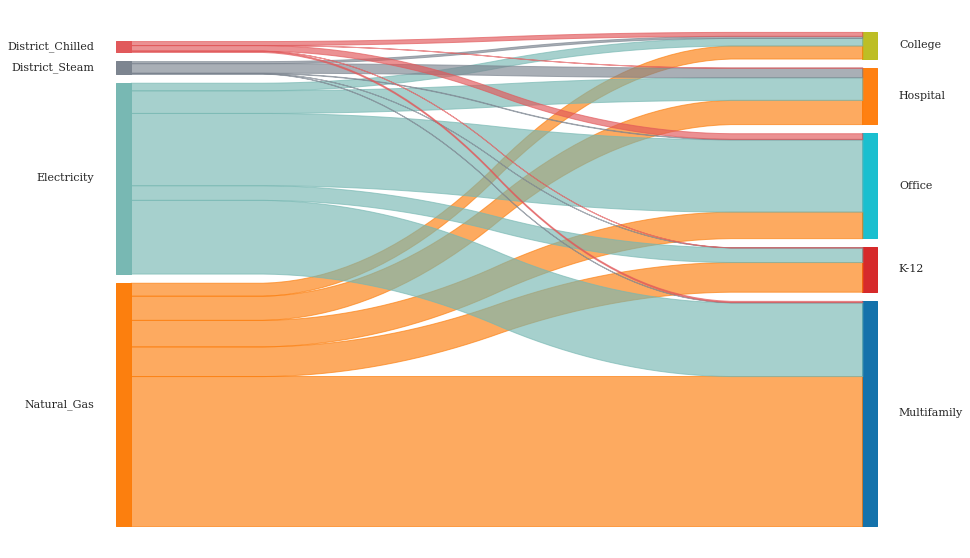

In [ ]:
#@title
chi = CHI_data[['Primary Use', 'Natural Gas Use (kBtu)','Electricity Use (kBtu)','District Chilled Water Use (kBtu)','District Steam Use (kBtu)']]

chi = chi.groupby(['Primary Use']).agg(
     Natural_Gas = ('Natural Gas Use (kBtu)','sum'),
     Electricity = ('Electricity Use (kBtu)','sum'),
     District_Steam = ('District Steam Use (kBtu)','sum'),
     District_Chilled = ('District Chilled Water Use (kBtu)','sum'),
     )

chi.sort_values('Natural_Gas', ascending=False, inplace=True)

chi = chi.head(5)

chi = chi.stack()

chi = chi.reset_index()

chi.replace('Multifamily Housing', 'Multifamily', inplace=True)
chi.replace('Hospital (General Medical & Surgical)', 'Hospital', inplace=True)
chi.replace('College/University', 'College', inplace=True)
chi.replace('K-12 School', 'K-12', inplace=True)

CHI_sankey = chi

colorDict =  {'Natural_Gas':'#FC7D0B','Electricity':'#76B7B2','District_Steam':'#7B848F',
              'District_Chilled':'#E15759','Diesel':'#1170AA', 'Multifamily':'#1170AA','Hospital':'#FF7F0E','Office':'#17BECF',
              'College':'#BCBD22','K-12':'#D62728'}
sankey(
    left=CHI_sankey["level_1"], right=CHI_sankey["Primary Use"], 
    leftWeight= CHI_sankey[0], rightWeight=CHI_sankey[0],
    leftLabels=None, rightLabels=None, 
    aspect=20, colorDict=colorDict, fontsize=11,
)

# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(15, 10)

***

## ENERGY STAR Score

**ENERGY STAR Score:** The ENERGY STAR score provides a snapshot of your building’s energy performance in a 1 to 100 scale, where the higher the score, the better the energy performance of the building. Often, the EPA’s Energy Star Portfolio Manager (ESPM) is used for reporting benchmarking data and buildings are assigned an ENERGY STAR score based on the building's energy performance against that of similar buildings across the country. The score normalizes for climate, weather, building size and other factors.   

**Distribution of ENERGY STAR Score per City**  
The below histograms clearly indicate that count of Energy Star Score is greater for higher range of energy star scores, with exception of buildings that have a score of one.

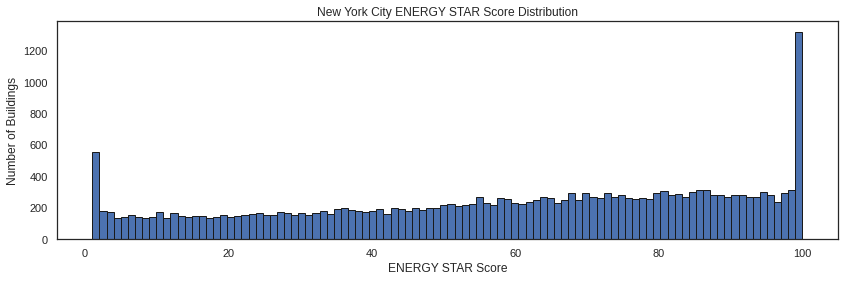

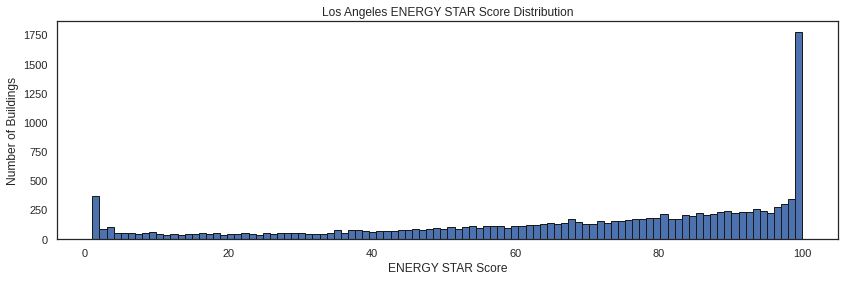

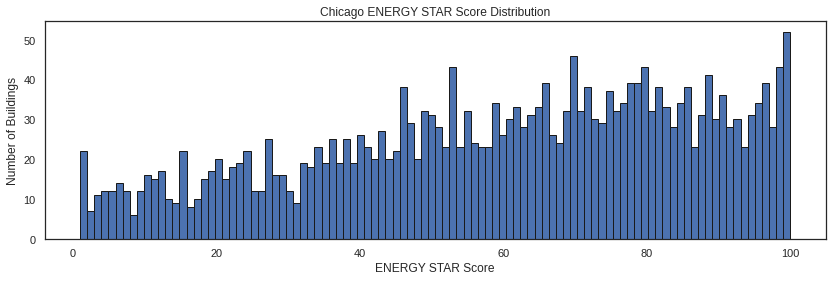

In [2]:
#@title
for data, name in zip(data_list, data_names):
  # Histogram of the Energy Star Score
  plt.figure(figsize=(14,4))
  plt.style.use('seaborn-white')
  plt.hist(data['ENERGY STAR Score'].dropna(), bins = 100, edgecolor = 'k')
  plt.xlabel('ENERGY STAR Score'); plt.ylabel('Number of Buildings')
  plt.title(name+' ENERGY STAR Score Distribution')
  plt.show()

***

## Average Site EUI by Primary Use

**Site EUI (kBtu/sf):** EUI is Energy Use Intensity at the building or site. EUI is energy in kBtu per square foot per year.

<br>

**New York** - Senior Care Community buildings consumed the most energy per square foot in 2020.

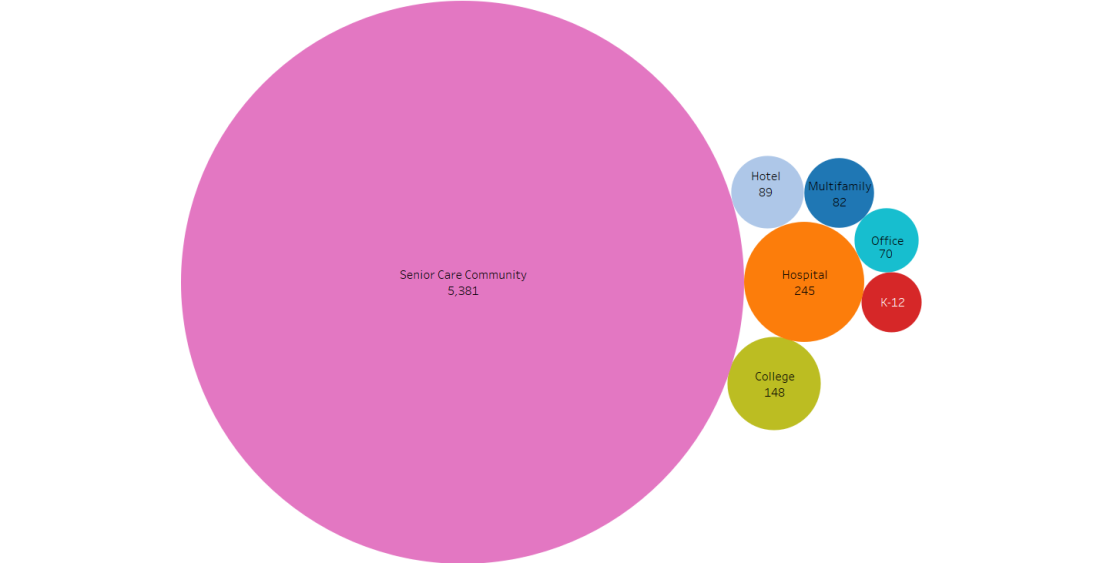

<br>

**Los Angeles** - Manufacturing buildings consumed the most energy per square foot.

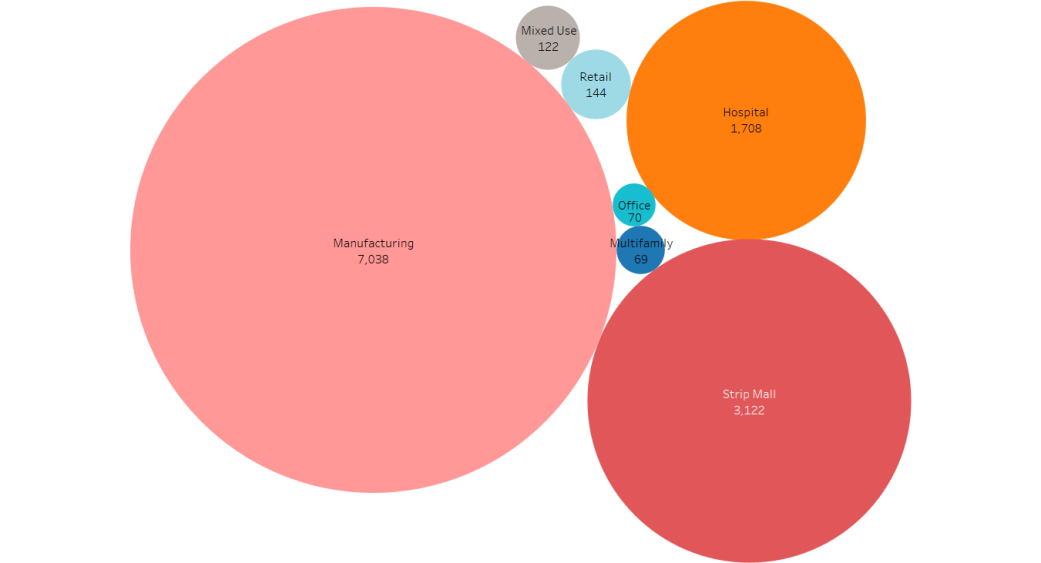

<br>

**Chicago** - Hospitals consumed the most energy per square foot, followed closely by Colleges.

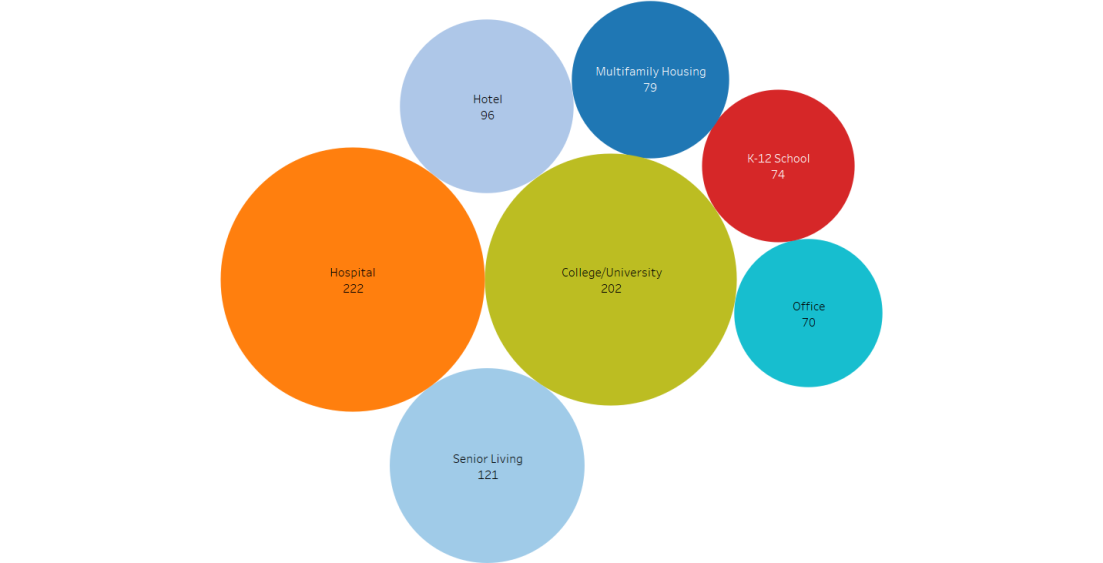

***

## Total GHG Emissions

Total greenhouse gas emissions in Metric Tons of CO2 equivalent

This includes indirect GHG emissions, the emissions resulting from the use of electricity, district steam, district hot water, or district chilled water and direct GHG emissions, the emissions resulting from fuels that are burned on-site, such as natural gas, propane, all fuel oils, and coal.  
<br>
*Total GHG Emissions and Total Site EUI: Shown in logarithmic scale to represent wide variation in data*

<br>

**New York** - Multifamily buildings have a huge variability in terms of GHG emissions per building and hospitals have the highest total GHG emissions per building.

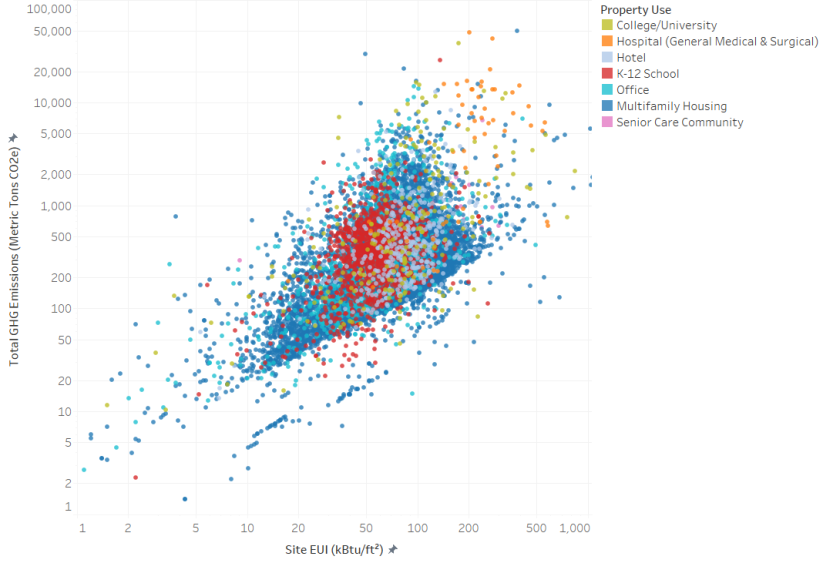

<br>

**Los Angeles** - Again hospitals, along with office and manufacturing buildings have the highest Total GHG emissions in the city

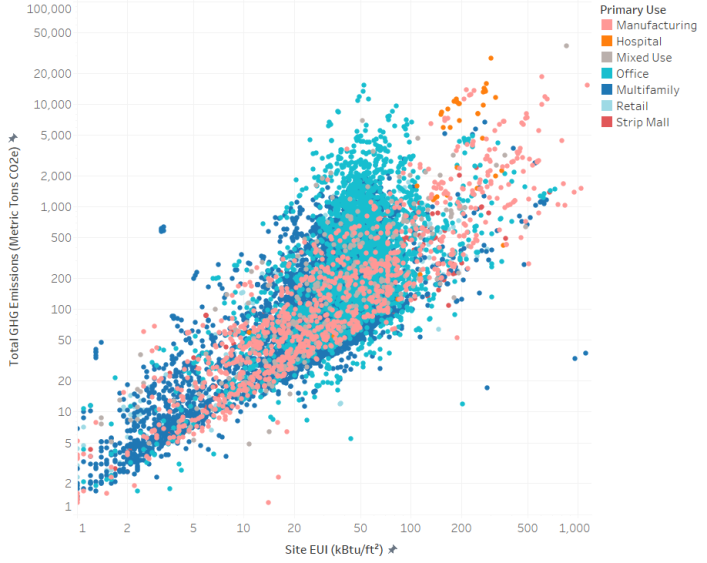

<br>

**Chicago** - Similarly, hospitals and office buildings have the highest GHG emissions

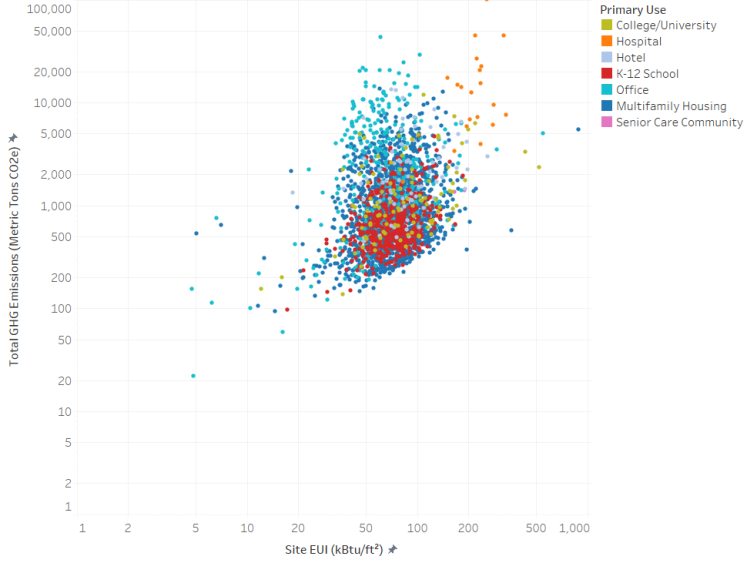

***

## Total Site Energy per Primary Use

**Site Energy Use (kBtu):** Total energy use at the building or site in kBtu.  



<br>

**New York** - Multifamily buildings consumed the most energy followed by Senior Care Community buildings

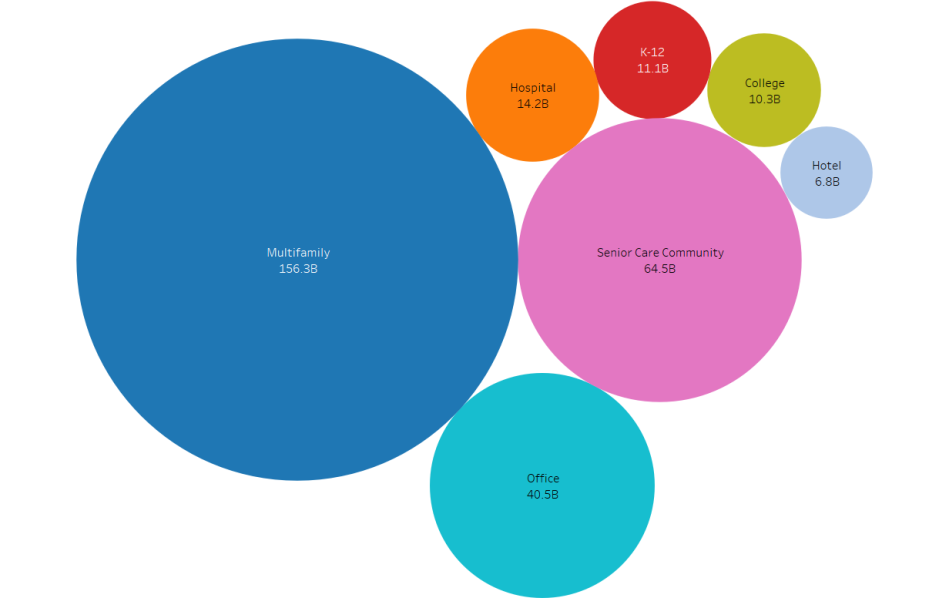

<br>

**Los Angeles** - Hospitals consumed the most energy in 2020 and this could be due to Covid-19 pandemic.

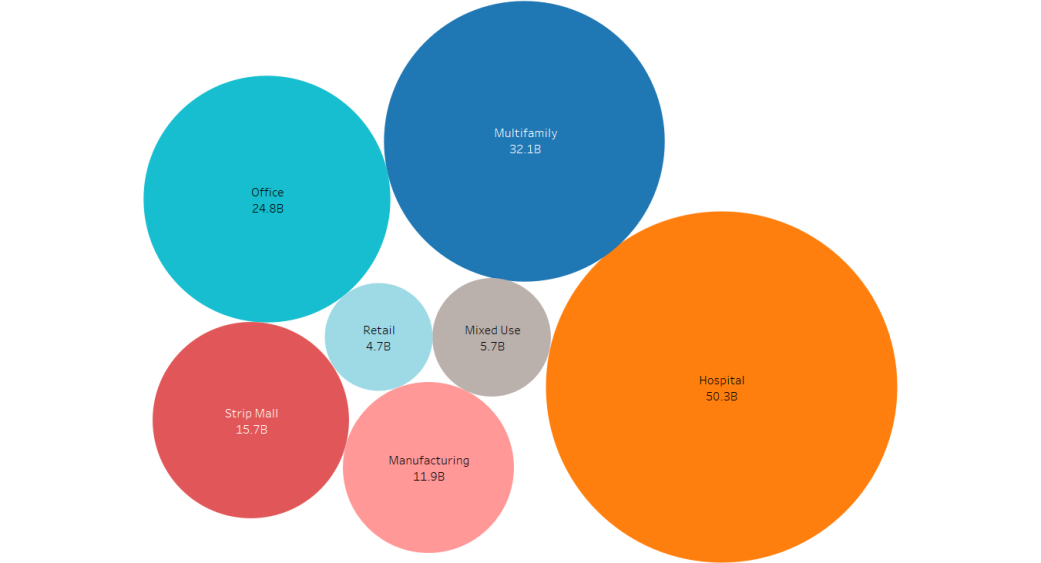

<br>



**Chicago** - Multifamily buildings consumed the most energy followed by Office buildings.

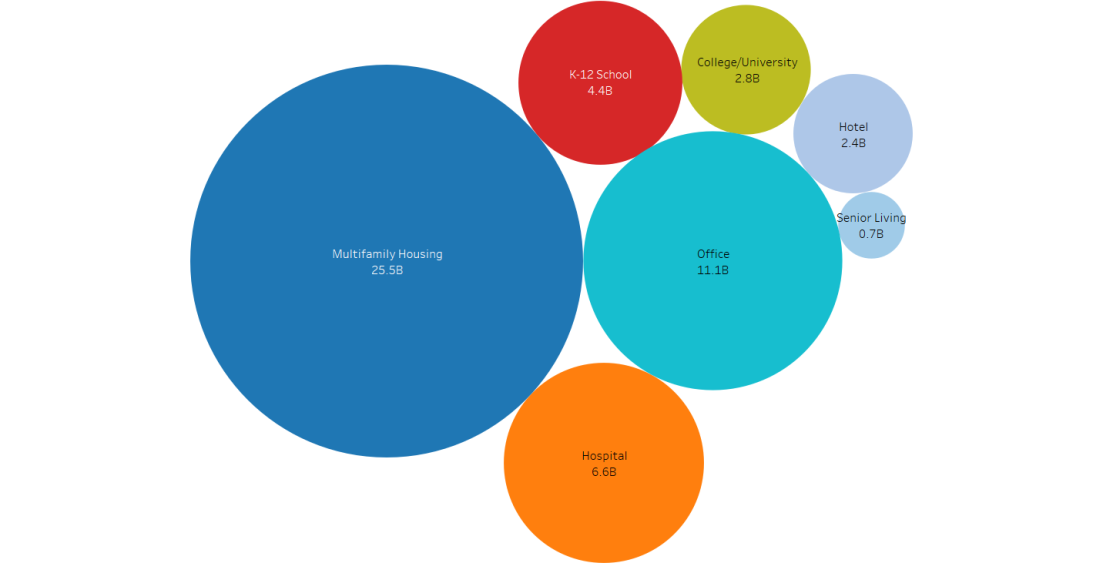

<br>

---

# **A Closer Look at Each City**



<br>

### **New York**

Over 25,000 properties complied with New York's benchmarking ordinance,  encompassing more than 3 billion square feet of real estate.

<br>

**Number of of buildings reporting per New York City borough**

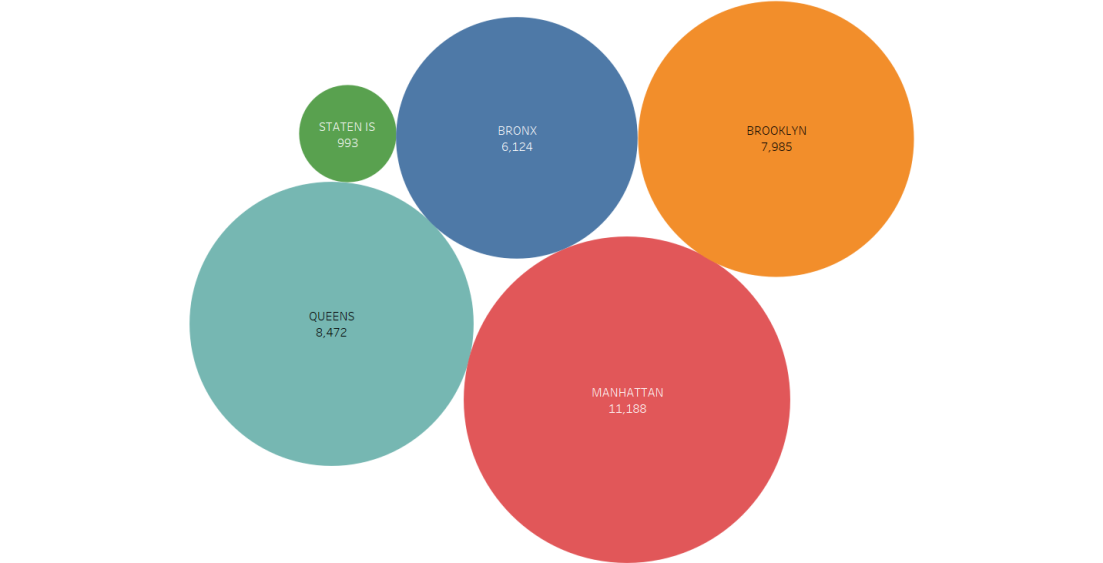

<br>

**Total site energy (in kBtu) reported per borough**   
- Manhattan, with a total 135 Billion kBtu, has the highest share of reported total site energy

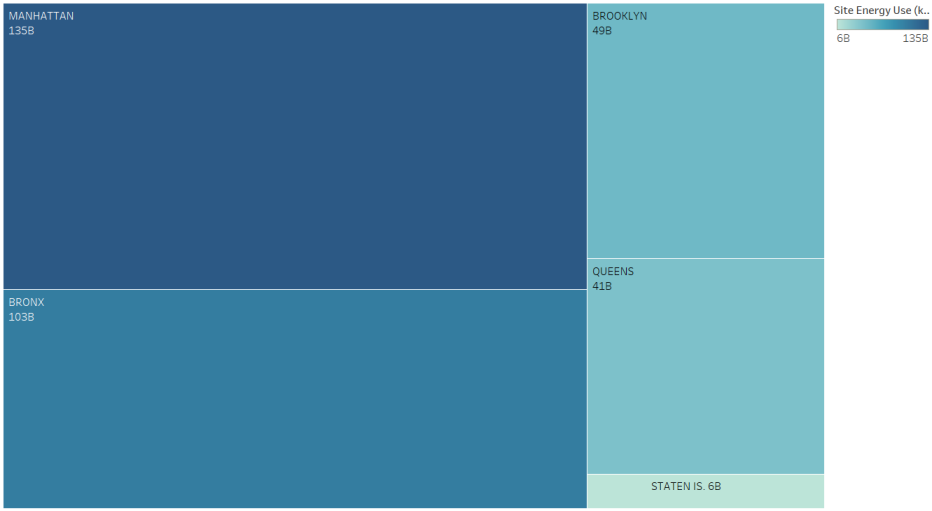

<br>

**Average site EUI per borough**    
- The Bronx buildings consume the most energy per square foot compared to other boroughs

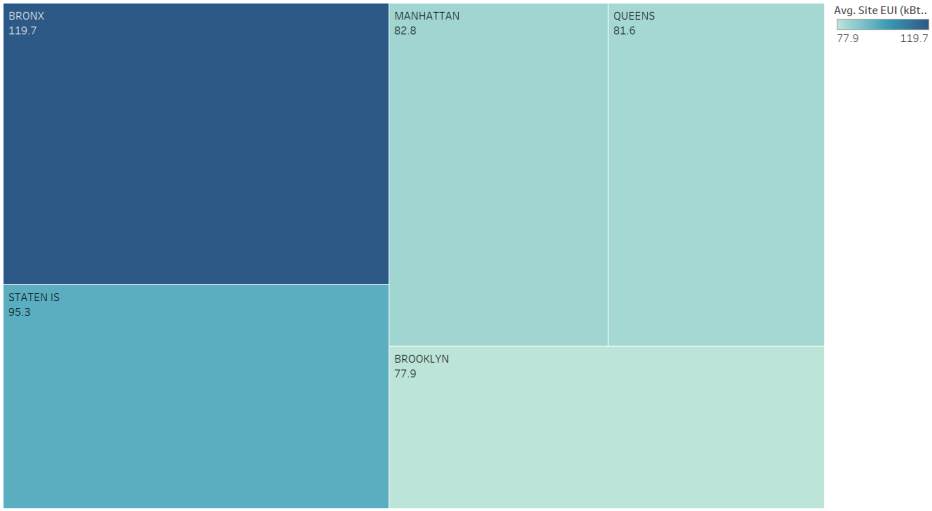

<br>

**Total Site EUI per ZIP code**   
- ZIP code 10457 reported the highest total EUI in 2020

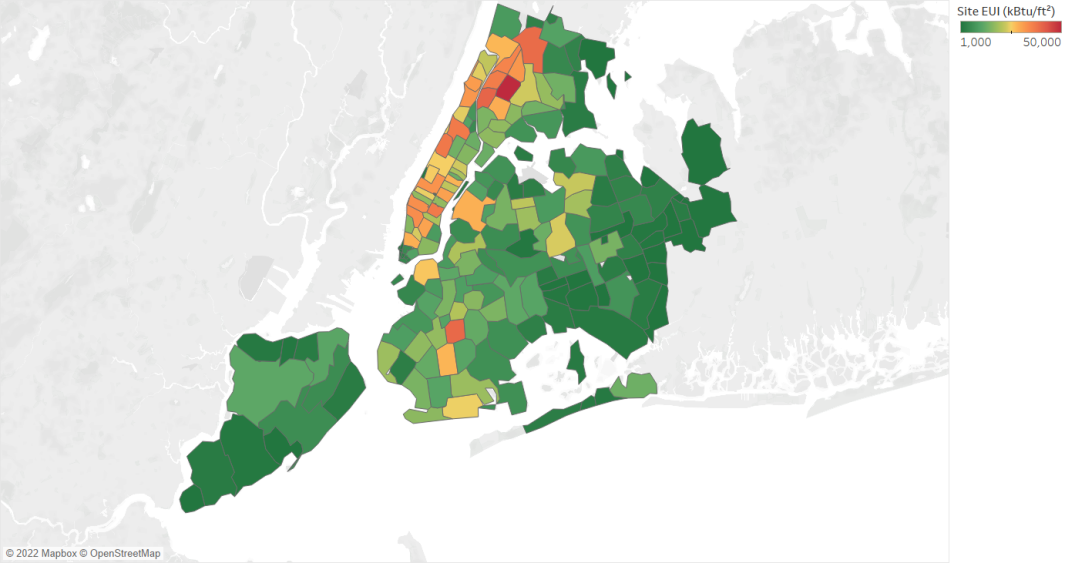

<br>

**Distribution of buildings by Primary Use**  
- Manhattan and the Bronx have a denser distribution of multifamily buildings while the lower half of Manhattan has the highest concentration of office buildings above 25,000 square feet

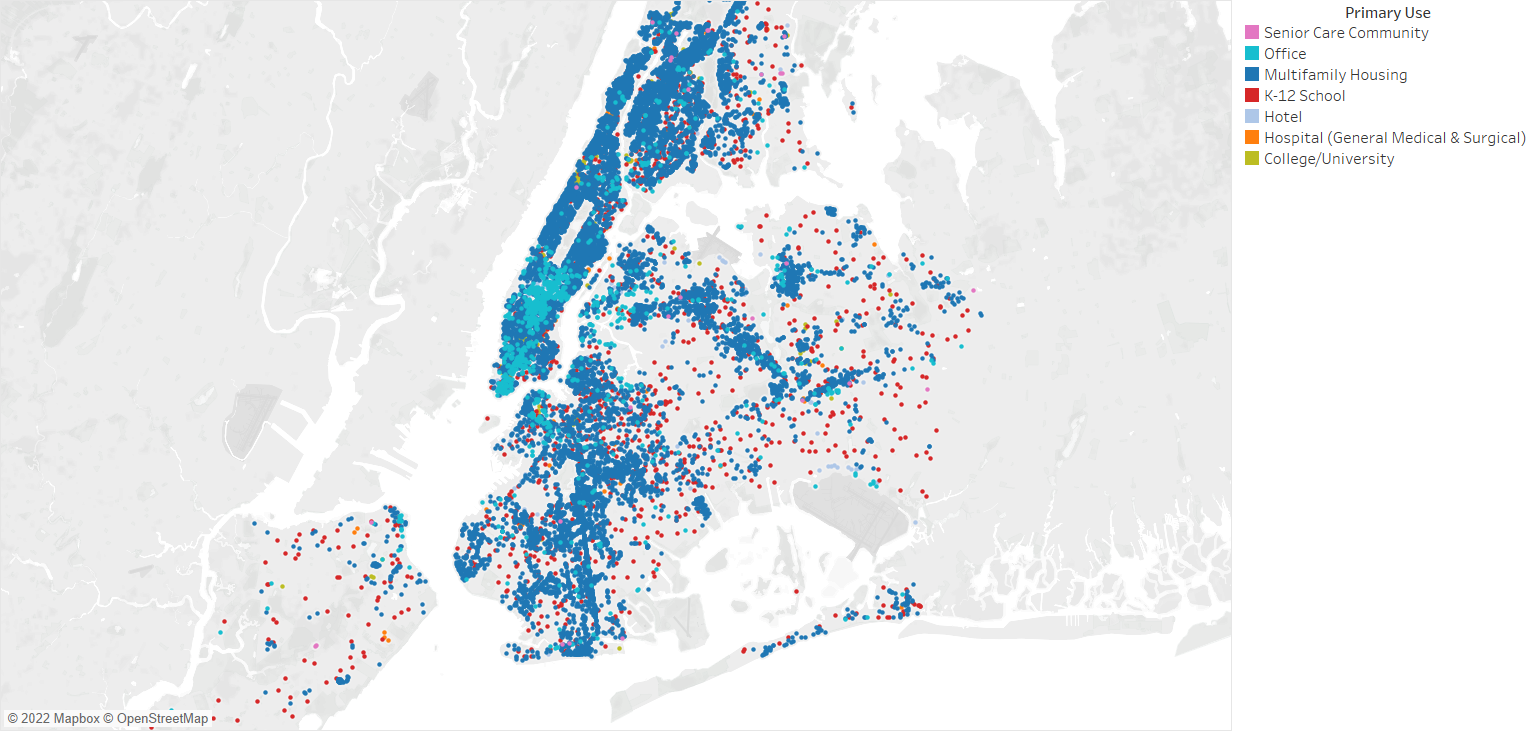

<br>

**Average Energy Star Score and Site EUI per Year Built**   
- Buildings built since 2015 have lower Site EUI and these buildings are getting higher Energy Star scores on average. This could be due to the introduction of New York City Energy Conservation Code (NYCECC) in 2011.

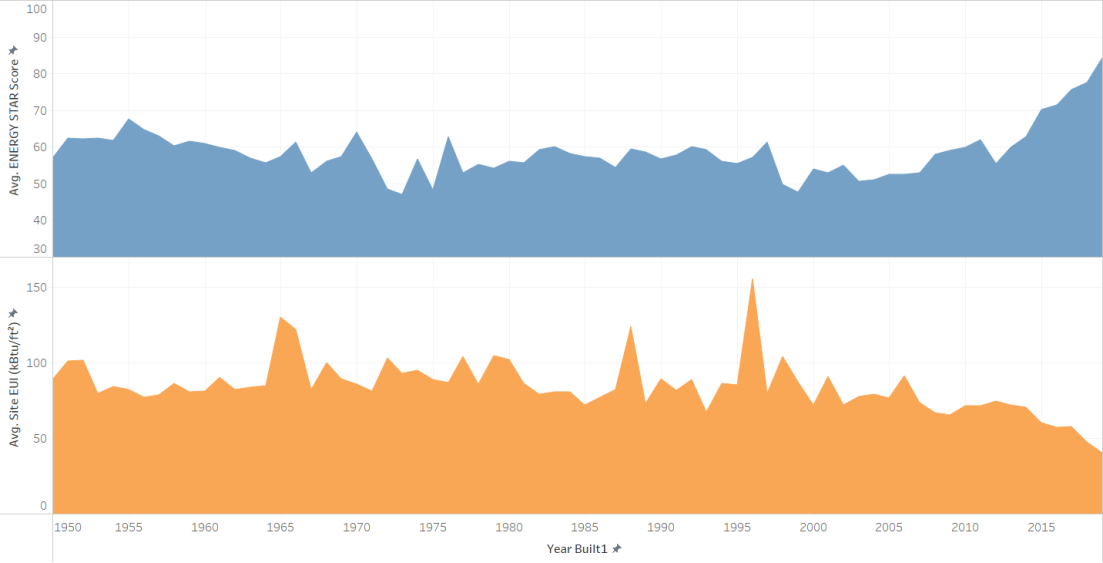

<br>

---

### Los Angeles

A total of 20,000 buildings have reported covering more than 2 billion square feet of real estate

<br>

**Number of buildings reporting per Neighborhood**



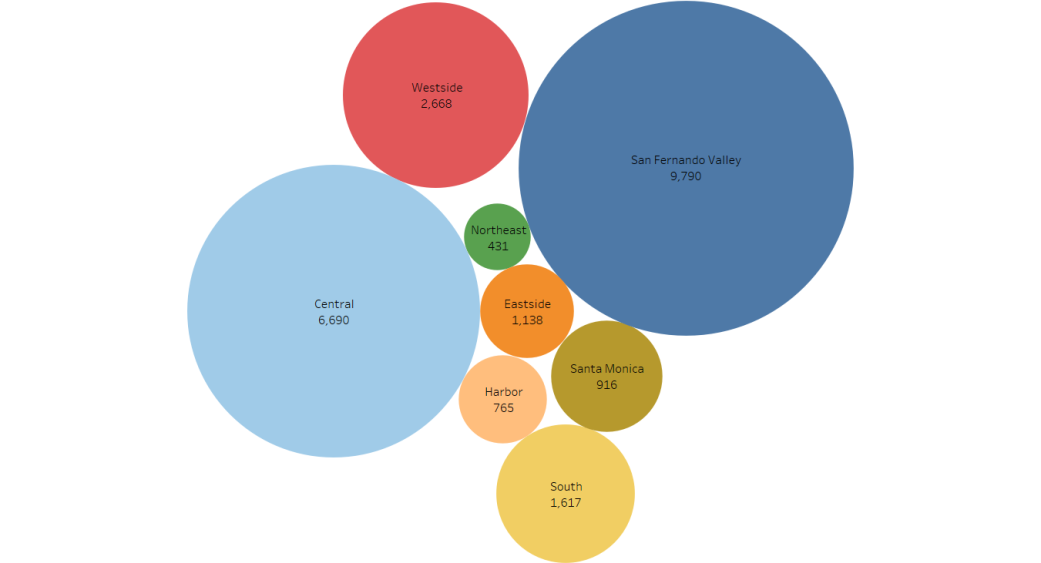

<br>

**Total site energy (in kBtu) reported per neighborhood**   
- San Fernando Valley and Eastside Los Angeles have the highest share of reported total site energy

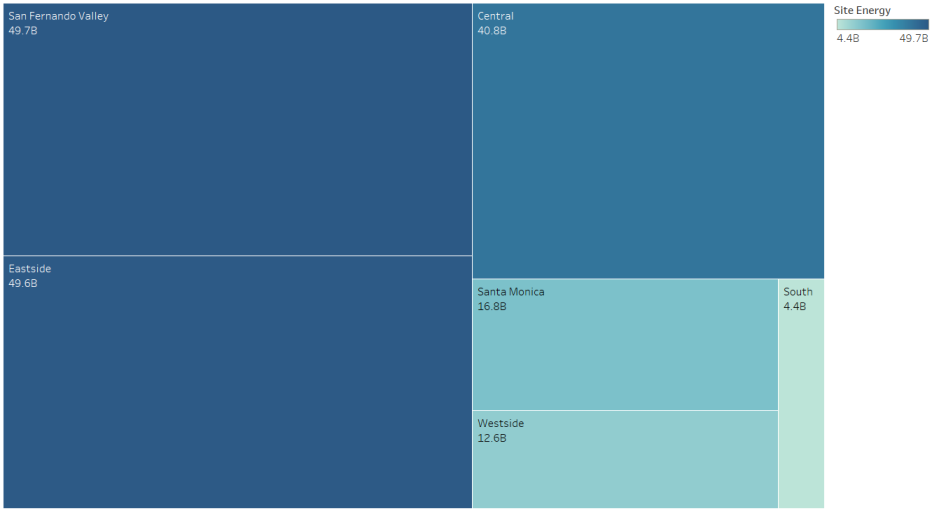

<br>

**Average site EUI per neighborhood**   
- The San Fernando Valley area consumes the most energy per square foot by far

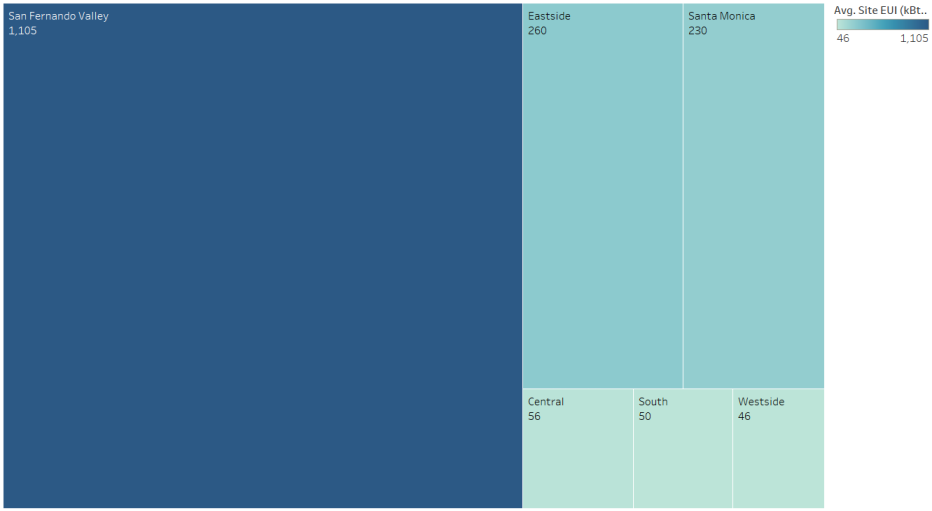

<br>

**Total Site EUI per ZIP code**    
- Several ZIP codes in the San Fernando Valley (northern Los Angeles) reported the highest total site EUI per ZIP code.

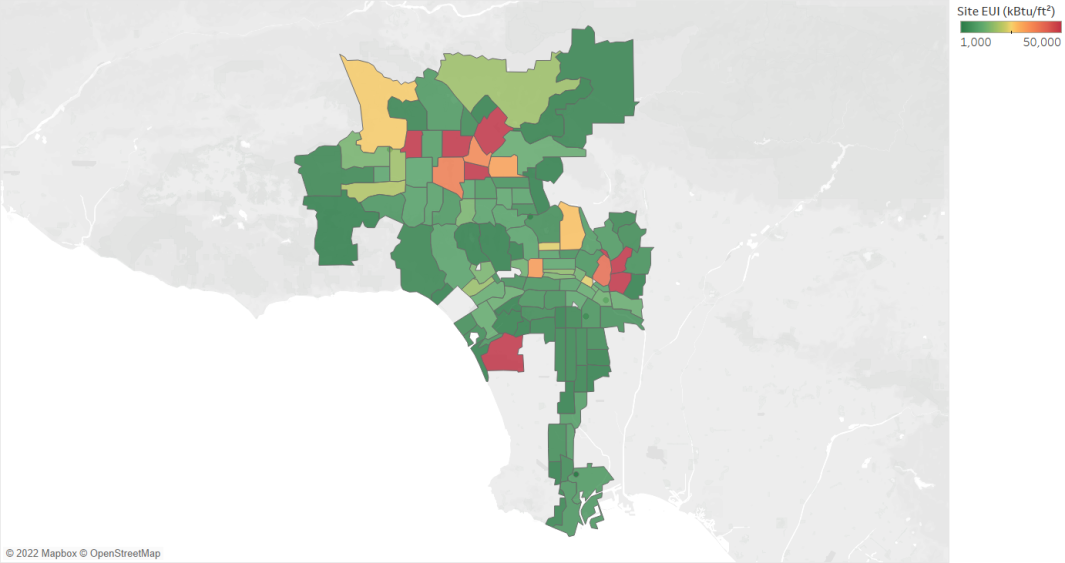

<br>

**Distribution of buildings by Primary Use**    
- The larger multifamily and manufacturing buildings (over 20,000 square feet) are concentrated in the north in San Fernando valley and in East Los Angeles.

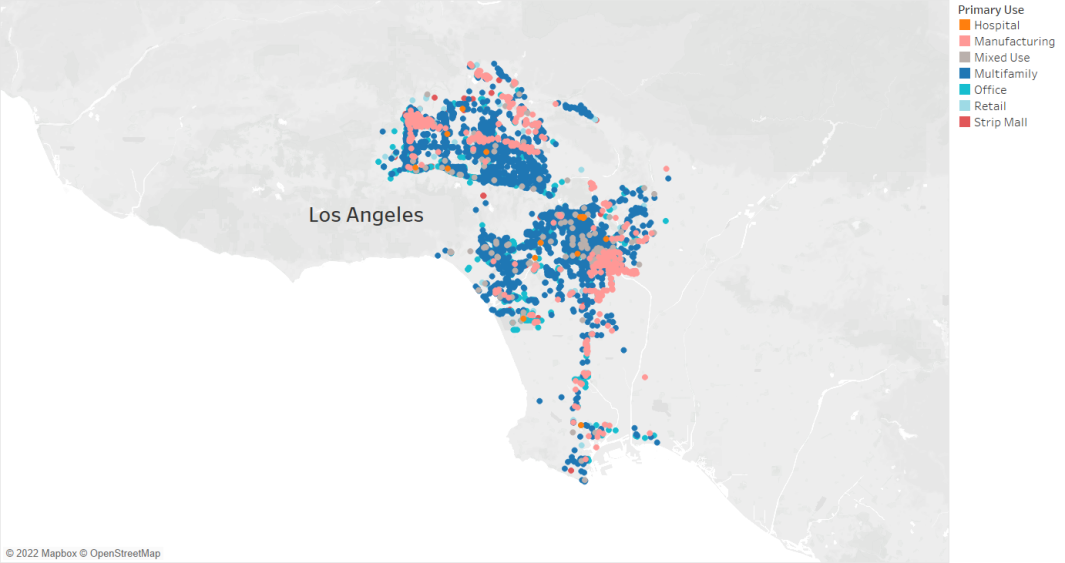

<br>

---

## Chicago

In 2020, 2,841 properties spanning over 720 million square feet reported energy usage.

<br>

**Number of Buildings Reporting per Community Area**

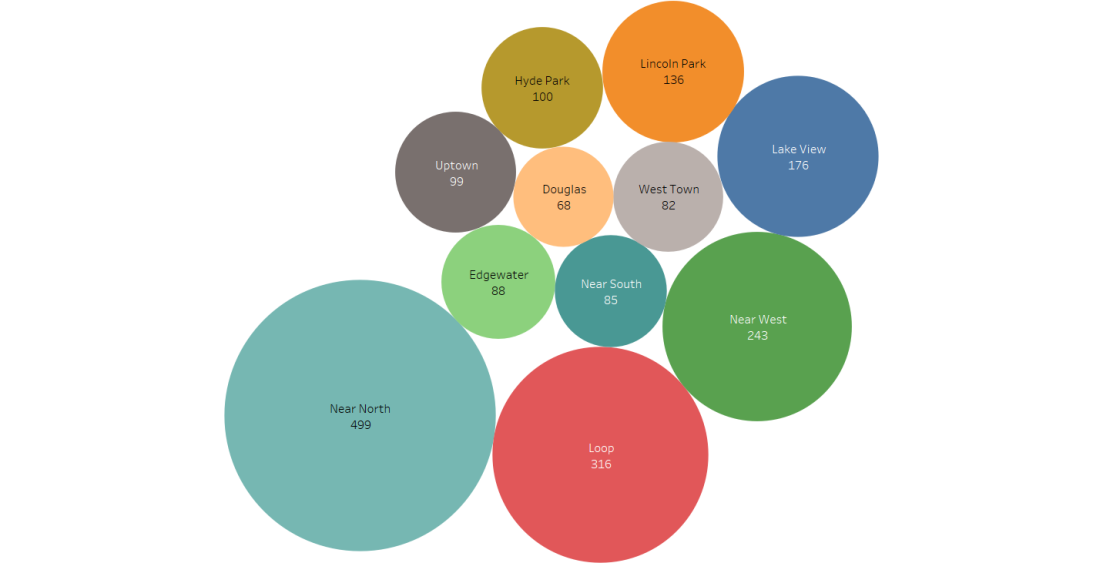

<br>

**Total site energy (in kBtu) reported per community area**    
- Near North, with a total 14.4 Billion kBtu, has the highest share of reported total site energy, followed closely by the Loop.

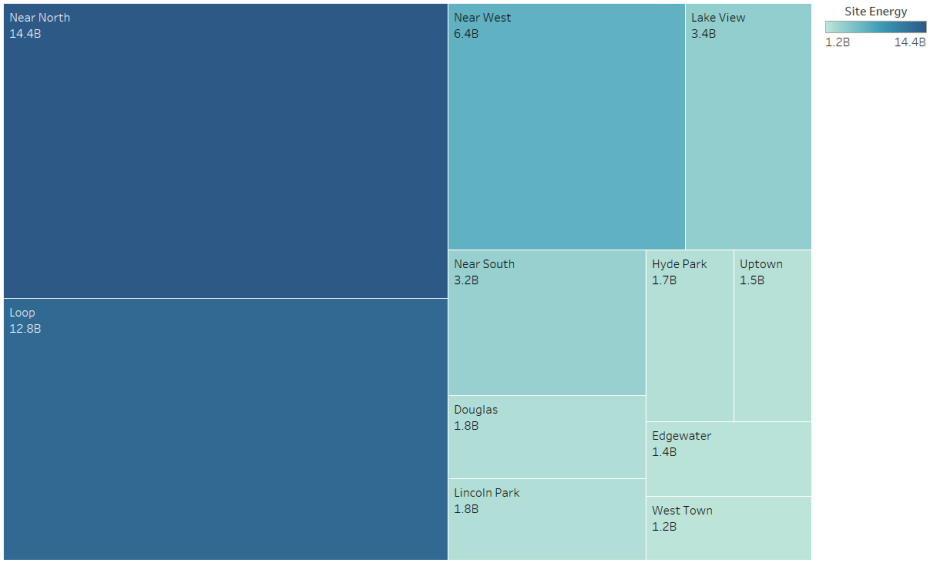

<br>

**Average site EUI per community area**    
- The Douglas area consumes the most energy per square foot compared to other areas

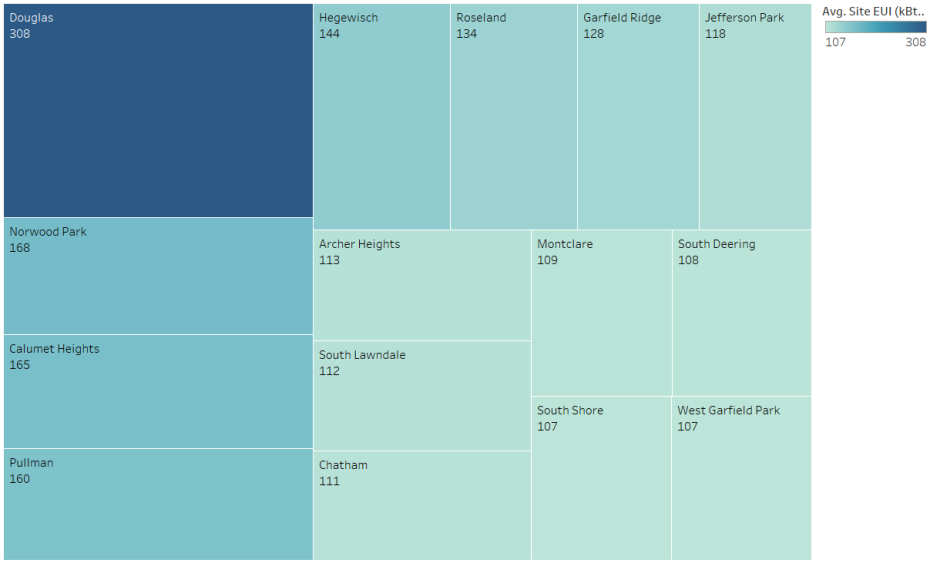

<br>

**Total Site EUI per ZIP code**    
- ZIP code 60616 in the Loop reported the highest total site EUI in 2020.

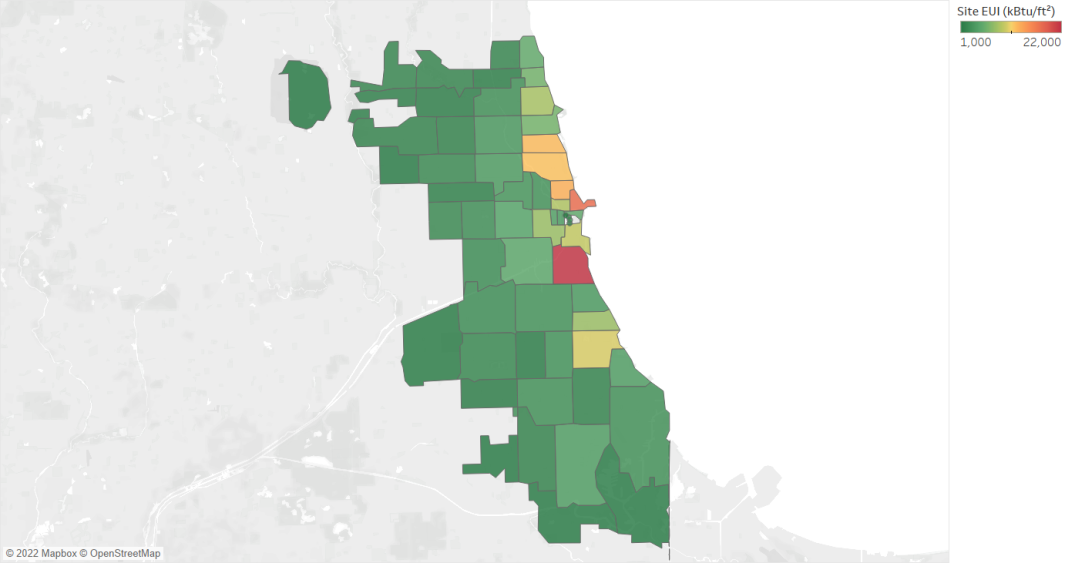

<br>

**Distribution of buildings by Primary Use**    
- In Chicago, buildings over 50,000 square feet are densely concentrated along Lake Michigan and in the loop area. Schools that reported their energy data are dispersed throughout the city.

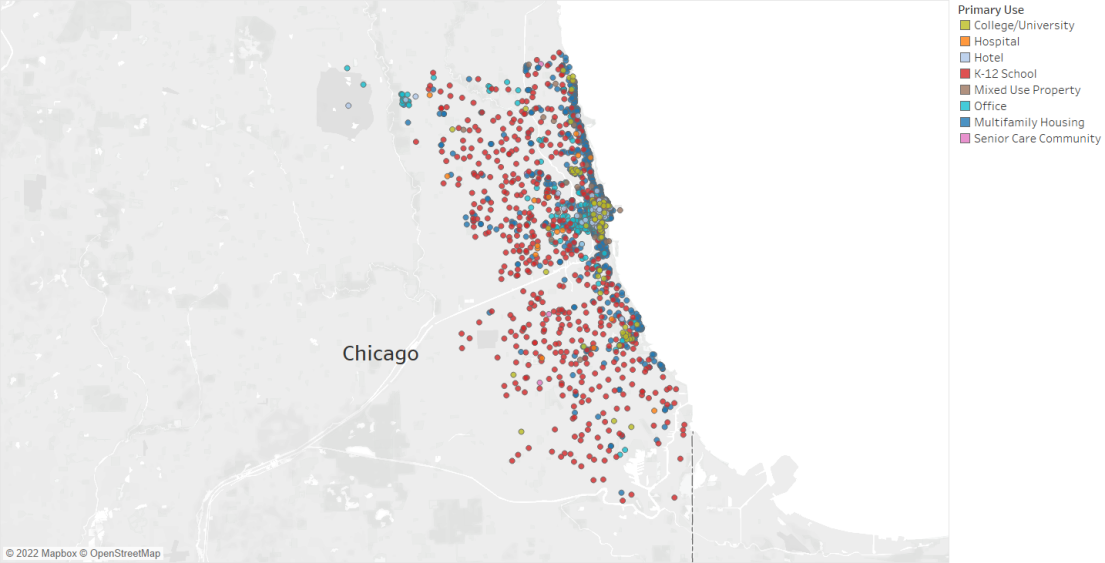